In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
df = pd.read_excel("pharmaco.xlsx")


In [3]:
df = df.drop(['id'],1)


In [4]:
cols = list(df)
for i in cols:
    df[i] = df[i].replace(i,0)
    

In [5]:
def parse_strings(col):
    list1 = []
    for i in df[col]:
        
        if (type(i) != int):
            list1.append(0)
        else:
            list1.append(i)
    df[col] = list1

In [6]:
for i in cols:
    parse_strings(i)

In [8]:
df.head(5)

,piportil inj,haldol gtt,haldol 5 mg,haldol decanoas,modecate inj,modecate 25,dogmatil 50,sinapride 50,sinaprid srp,tiapridal 100,...,avlocardyl 40,modopar 250,aleozen,trivastal 300,stress off,teros 10,sedatif pc,dorzen 2mg,piracet 400,stilnox
0,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
count_dict_phar = {}
value_dict_phar = {}
for i in list(df):
    
    count_dict_phar[i] = 0
    value_dict_phar[i] = 0
    for v in df[i]:
        
        if v != 0:
            count_dict_phar[i] += 1
            value_dict_phar[i] += v
        else:
            pass

In [10]:
count_dict_phar = pd.DataFrame([count_dict_phar])

In [11]:
value_dict_phar = pd.DataFrame([value_dict_phar])

In [12]:
count_dict_phar

,abilify 10,akineton LP 4,akineton LP 4.1,alcium buvable,aleozen,amytril 10,amytril 25,anafranil 10,anafranil 25,anxetin 20,...,urbanyl 10,uteplex amp,vaicor 10,vaincor 5 mg,valium 5,vit B6,vit E,"zenexor lp 37,5",zolen 200,zoloft 50
0,0,0,100,0,0,0,0,0,0,0,...,0,0,14,0,0,0,0,0,0,0


In [13]:
value_dict_phar.describe()

,abilify 10,akineton LP 4,akineton LP 4.1,alcium buvable,aleozen,amytril 10,amytril 25,anafranil 10,anafranil 25,anxetin 20,...,urbanyl 10,uteplex amp,vaicor 10,vaincor 5 mg,valium 5,vit B6,vit E,"zenexor lp 37,5",zolen 200,zoloft 50
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,0.0,0.0,7228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1002.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0,0.0,7228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1002.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,7228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1002.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,7228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1002.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,7228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1002.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,7228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1002.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
def get_pct(col):
    
    pct = (count_dict_phar[col] / 552) * 100
    return pct

In [15]:
for i in list(count_dict_phar):
    count_dict_phar[i] = get_pct(i)

In [16]:
meds = list(count_dict_phar)
vals = count_dict_phar.loc[0]

meds_df = pd.DataFrame({'Meds': meds,'Vals': vals})

In [17]:
meds_df.head(5)

,Meds,Vals
abilify 10,abilify 10,0.000000
akineton LP 4,akineton LP 4,0.000000
akineton LP 4.1,akineton LP 4.1,18.115942
alcium buvable,alcium buvable,0.000000
aleozen,aleozen,0.000000


In [46]:
count,len(list(meds_df['Meds']))

(80, 103)

In [19]:
max_pop_meds = meds_df.sort_values(by="Vals",ascending=False)[:10]

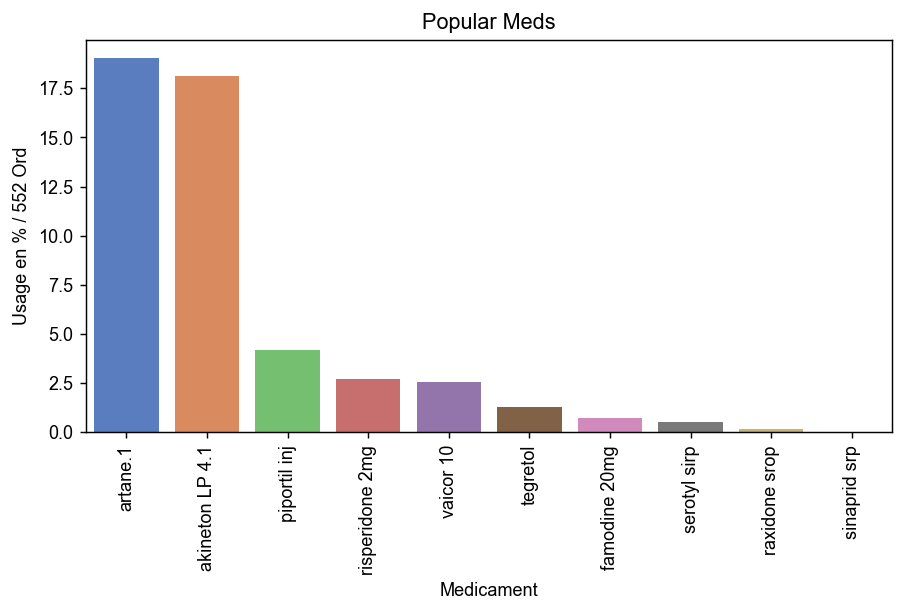

In [20]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,4), dpi = 130)

sns.barplot(x="Meds",y="Vals",data=max_pop_meds,palette = "muted")
sns.set(style="darkgrid")
plt.title("Popular Meds")
plt.ylabel("Usage en % / 552 Ord")
plt.xlabel("Medicament")
plt.xticks(rotation=90)
plt.savefig('pop_meds.png',dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)
plt.show()

In [23]:
top_55_meds = meds_df.sort_values(by="Vals",ascending=False)[:55]
top_55_meds


num_gtt = 0
num_inj= 0
num_ser = 0

pil_name = []
pil_value= []
for i in top_55_meds['Meds']:
    
    if i[-3:] == "inj":
        num_inj += 1
    elif i[-3:] == "gtt":
        num_gtt += 1
    else:
        num_ser += 1
        pil_name.append(i)
        pil_value.append(top_55_meds.loc[i]['Vals'])
    

In [24]:
top_pills = pd.DataFrame({'Med': pil_name,'value': pil_value})

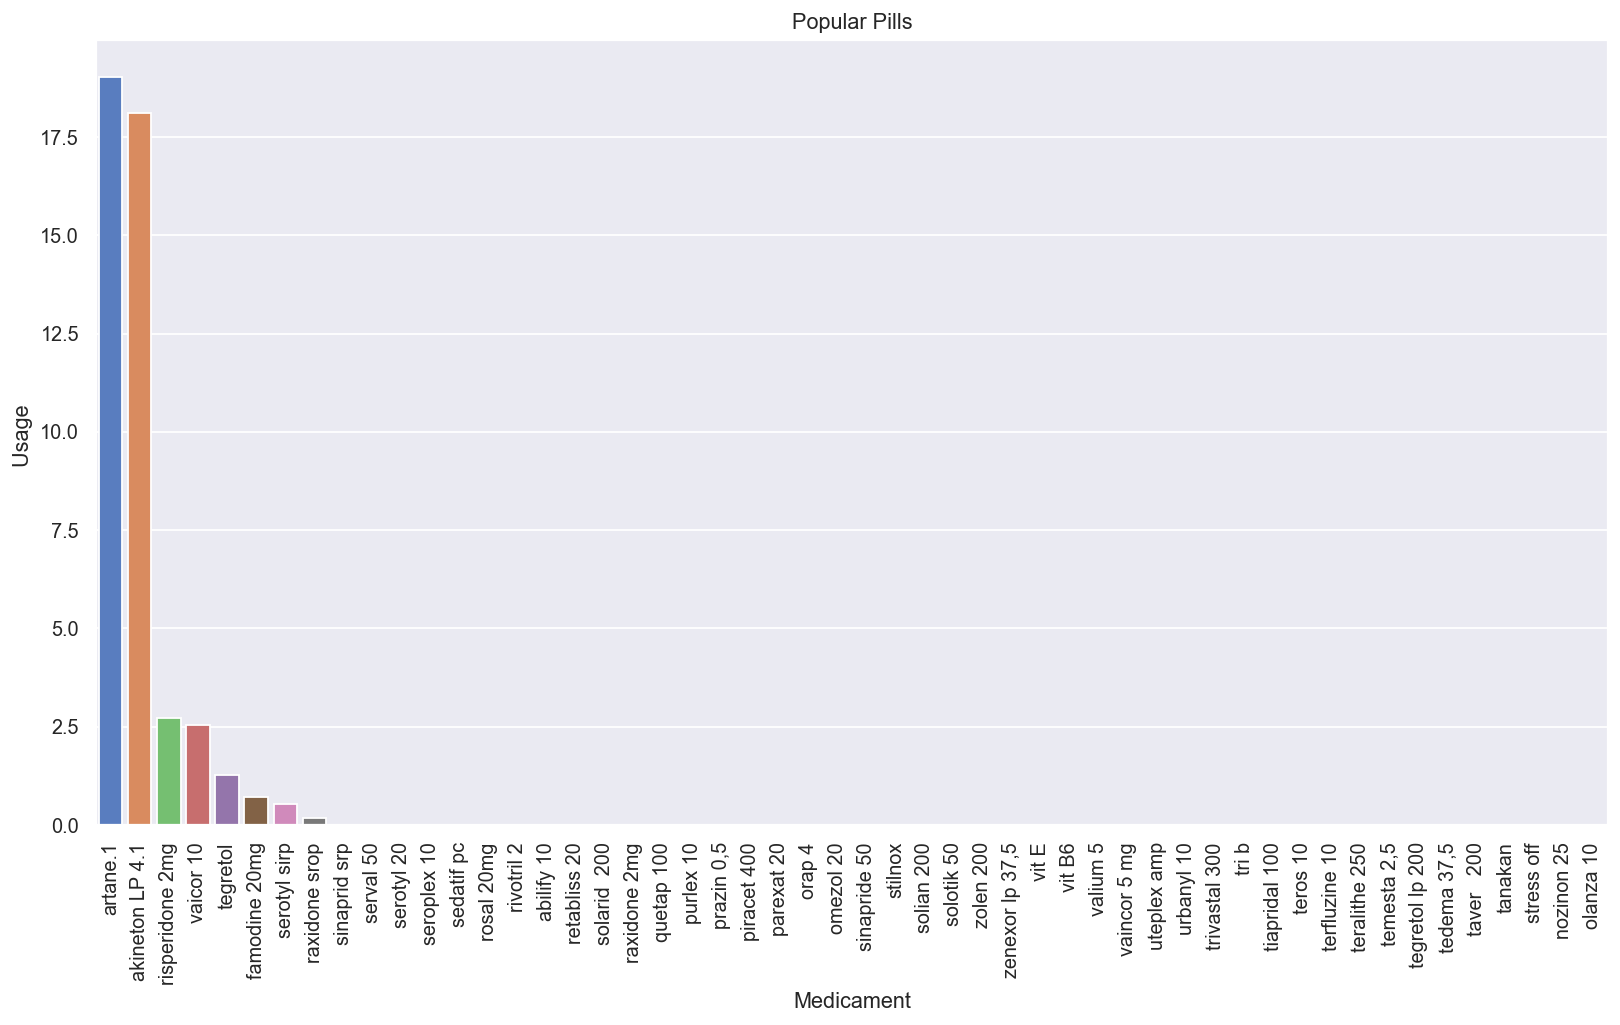

In [25]:

sns.set(style="darkgrid")
fig = plt.figure(figsize=(15,8), dpi = 130)
sns.barplot(x="Med",y="value",data=top_pills,palette = "muted")
sns.set(style="darkgrid")
plt.title("Popular Pills")
plt.ylabel("Usage ")
plt.xlabel("Medicament")
plt.xticks(rotation=90)
plt.savefig('pop_pills.png',dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)
plt.show()

In [26]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth

x = list(top_pills['value'])
print(x)
X = np.array(list(zip(x,np.zeros(len(x)))), dtype=np.int)
bandwidth = estimate_bandwidth(X, quantile=0.1)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

for k in range(n_clusters_):
    my_members = labels == k
    print ("cluster {0}: {1}".format(k, X[my_members, 0]))

[19.021739130434785, 18.115942028985508, 2.717391304347826, 2.536231884057971, 1.2681159420289856, 0.7246376811594203, 0.5434782608695652, 0.18115942028985507, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
cluster 0: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
cluster 1: [2 2]
cluster 2: [19]
cluster 3: [18]
cluster 4: [1]


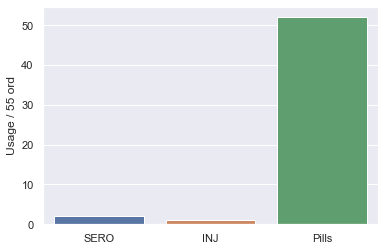

In [27]:
x=['SERO','INJ','Pills']
y = [num_gtt,num_inj,num_ser]
sns.barplot(x,y)
plt.savefig('pills_vs_inj.png',dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)
plt.ylabel("Usage / 55 ord")
plt.show()

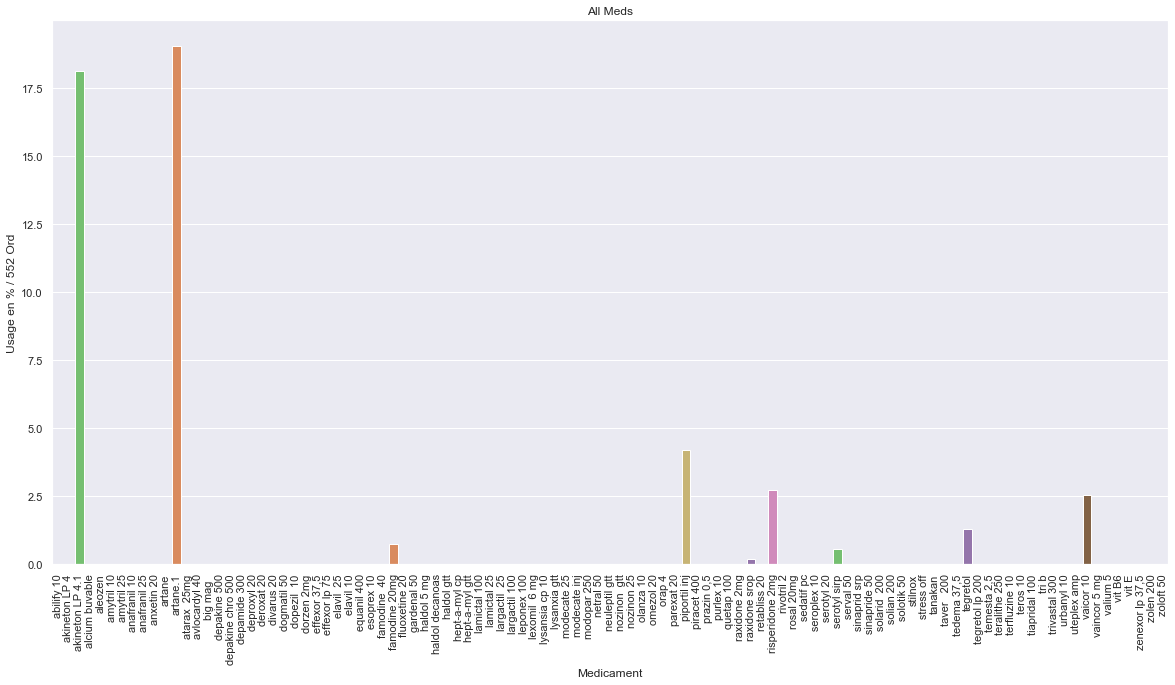

In [28]:
import matplotlib.pyplot as plt

fig, ax1= plt.subplots(1,1,figsize=(20,10))

sns.barplot(x="Meds",y="Vals",data=meds_df,palette = "muted",ax=ax1)
sns.set(style="darkgrid")
plt.xticks(rotation=90)
plt.ylabel("Usage en % / 552 Ord")
plt.xlabel("Medicament")
plt.title("All Meds")
plt.savefig('all_meds.png',dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)
plt.show()